# NCAA ML Competition - Women's 2018

## Notes

Notes about what's in the data files: https://www.kaggle.com/c/womens-machine-learning-competition-2018/data

Starter Kernel might help: https://www.kaggle.com/juliaelliott/basic-starter-kernel-ncaa-women-s-dataset

In [210]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

## EDA - WRegularSeasonDetailedResults




In [216]:
df_stage2 = pd.read_csv('WStage2DataFiles/WRegularSeasonDetailedResults.csv')

### Explore the impact of relative team performance on game outcome

0.61802937970724736

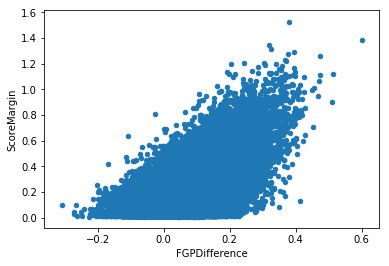

In [217]:
## Rescale field goal performance into a percentage
## Calculate field goal percentage difference between the winning and losing teams and explore potential relationship
## with margin of victory (difference in score for a game)

df.is_copy= False
df['WFGP'] = df.WFGM / df.WFGA ## Field goal percentage for the winning team
df['LFGP'] = df.LFGM / df.LFGA ## Field goal percentage for the losing team
df['FGPDifference'] = (df.WFGP - df.LFGP) ## Difference in field goal percentage
df['ScoreMargin'] = 2 * (df.WScore - df.LScore) / (df.WScore + df.LScore) ## rescaled score margin
df.plot.scatter(x='FGPDifference', y='ScoreMargin')
np.corrcoef(df.FGPDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

A higher field goal percentage difference is strongly associated with win margin.

nan

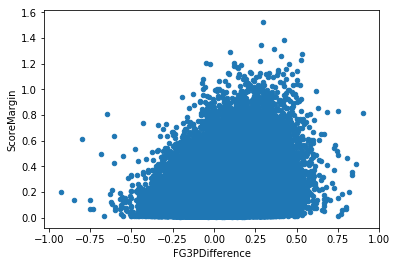

In [218]:
## Repeat the above for 3 point field goal performance

df['WFG3P'] = df.WFGM3 / df.WFGA3 ## 3 point field goal percentage for the winning team
df['LFG3P'] = df.LFGM3 / df.LFGA3 ## 3 point field goal percentage for the losing team
df['FG3PDifference'] = (df.WFG3P - df.LFG3P) ## Difference in 3 point field goal percentage
df.plot.scatter(x='FG3PDifference', y='ScoreMargin')
np.corrcoef(df.FG3PDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

The correlation between 3 point field goal percentage difference and win margin is not too strong. This indicates that teams that win a game with a larger margin tend to have only slightly better 3 point field goal percentage than the losing team in that game.

nan

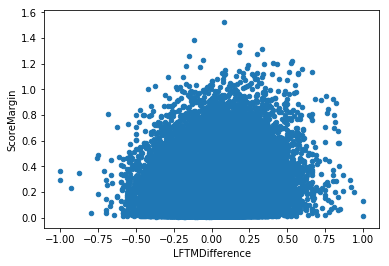

In [219]:
## Repeat the above for free throw performance

df['WFTP'] = df.WFTM / df.WFTA ## free throw percentage for the winning team
df['LFTP'] = df.LFTM / df.LFTA ## free throw percentage for the losing team
df['LFTMDifference'] = (df.WFTP - df.LFTP) ## Difference in free throw percentage
df.plot.scatter(x='LFTMDifference', y='ScoreMargin')
np.corrcoef(df.LFTMDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

Free throw performance by itself is not strongly associated with win margin. This is not surprising. Some teams have a lower 2 point field goal rate but they draw a larger number of persoanl fouls from the opposing team. This can lead to a difference in tactics of how the teams accumulate 2 point goals without impacting their overall success in scoring  2 point goals.

0.38124318122090917

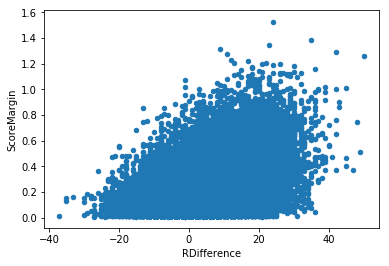

In [220]:
## Repeat the above for number of rebounds

df['WR'] = df.WOR + df.WDR ## total rebounds as the sum of offensive and defensive rebounds
df['LR'] = df.LOR + df.LDR ## total rebounds as the sum of offensive and defensive rebounds
df['RDifference'] = (df.WR - df.LR) ## Difference in free throw percentage
df.plot.scatter(x='RDifference', y='ScoreMargin')
np.corrcoef(df.RDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

Relative performance in offensive and defensive rebounds has a significant correlation with win margin

0.57557310251248317

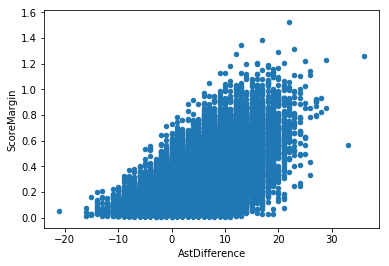

In [221]:
## Explore if the difference in assists between winning and losing teams correlate with win margin

df['AstDifference'] = (df.WAst - df.LAst) ## Difference in assists between winner and loser of a game
df.plot.scatter(x='AstDifference', y='ScoreMargin')
np.corrcoef(df.AstDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

Relative performance in assists has a strong correlation with win margin. Assists indicate a more orchestrated style of play and may be an indicator how a team collaborates and creates opportunities on the field.

0.29996139359742863

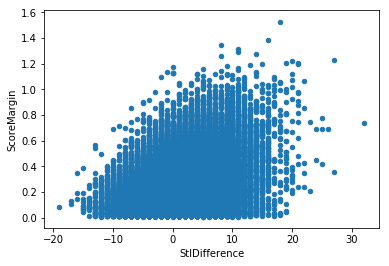

In [222]:
## Explore if the difference in steals between winning and losing teams correlate with win margin

df['StlDifference'] = (df.WStl - df.LStl) ## Difference in steals between winner and loser of a game
df.plot.scatter(x='StlDifference', y='ScoreMargin')
np.corrcoef(df.StlDifference, df.ScoreMargin)[0,1] ## Linear correlation measure

Relative performance in steals has a modest correlation with win margin.

0.392064011803
0.297041940477


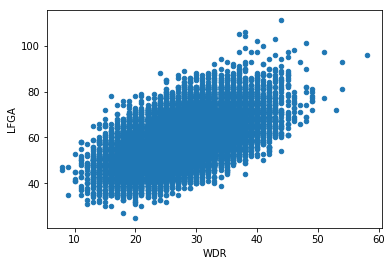

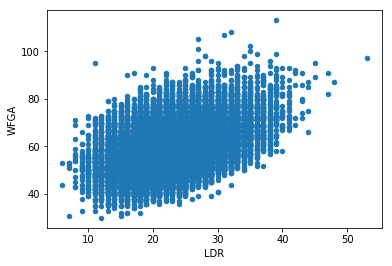

In [223]:
## Explore correlation of field goals attempted by a team and the opposing teams' number of rebounds 

df['WR'] = df.WOR + df.WDR ## total rebounds as the sum of offensive and defensive rebounds
df['LR'] = df.LOR + df.LDR ## total rebounds as the sum of offensive and defensive rebounds
df.plot.scatter(x='WDR', y='LFGA')
print np.corrcoef(df.WR, df.LFGA)[0,1] ## Correlation between a team's field goals attempts and opposing team's rebound counts
df.plot.scatter(x='LDR', y='WFGA')
print np.corrcoef(df.LR, df.WFGA)[0,1] ## Correlation between a team's field goals attempts and opposing team's rebound counts

Winning team's rebounding performance seems to impact the losing team's field goal attempts more than the other way around.

### Explore how performance difference has impacted game outcomes over time 

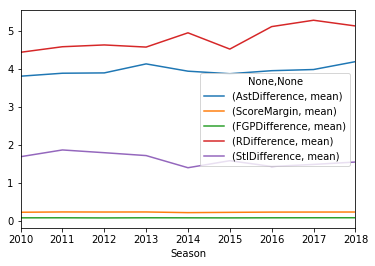

In [224]:
df2 = df[['Season', 'FGPDifference', 'RDifference', 'AstDifference', 'StlDifference', 'ScoreMargin']].groupby(['Season'], as_index=False).agg({'FGPDifference':['mean'], 'RDifference':['mean'], 'AstDifference':['mean'], 'StlDifference':['mean'], 'ScoreMargin':['mean']})
df2.plot(x='Season')

The importance of assists and rebounds in determining game outcomes has been rising over time.